# 8_Rna_Training_Model.ipynb

## Visão Geral

Este notebook tem como objetivo treinar um modelo de Rede Neural Artificial (RNA) para prever diferenças de latitude e longitude com base em dados de satélites. O processo envolve várias etapas, desde o carregamento e preparação dos dados até a construção, treinamento e avaliação do modelo. A seguir, uma descrição detalhada das principais seções e funcionalidades implementadas no notebook.

## Estrutura do Notebook

### Bloco 1: Imports e Configurações

- **Importação de Bibliotecas**: Carrega todas as bibliotecas necessárias, incluindo `numpy`, `pandas`, `matplotlib`, `tensorflow`, `sklearn`, entre outras.
- **Configurações Iniciais**: Define caminhos para os arquivos JSON de entrada e saída, parâmetros de treinamento como tamanho do lote (`BATCH_SIZE`), número de épocas (`EPOCHS`), proporção de validação (`VAL_SPLIT`), e outros parâmetros relevantes.

### Bloco 2: Funções Utilitárias

- **Descoberta de Chaves das Features**: Função para identificar todas as chaves (features) presentes no arquivo JSON, excluindo as colunas alvo (`TARGET_COLS`).
- **Conversão de Dicionário para Arrays NumPy**: Transforma cada registro do JSON em arrays NumPy (`X` para features e `y` para targets), garantindo que todas as features sejam representadas de forma consistente.
- **Gerador de Dataset com ijson**: Utiliza a biblioteca `ijson` para processar o arquivo JSON de forma eficiente e gerar pares `(X, y)` para o treinamento.
- **Criação do Dataset do TensorFlow**: Constrói um `tf.data.Dataset` para streaming dos dados, com funcionalidades de embaralhamento, agrupamento em lotes e prefetching para otimização do treinamento.

### Bloco 3: Construção do Modelo com Blocos Residenciais

- **Definição de Blocos Residenciais**: Implementa blocos residuais que ajudam a mitigar o problema de gradientes desaparecidos, permitindo a construção de modelos mais profundos.
- **Função de Construção do Modelo (`build_model`)**: Monta a arquitetura completa da RNA, incluindo camadas densas iniciais, múltiplos blocos residuais, camadas intermediárias e a camada de saída com ativação linear para prever as diferenças de latitude e longitude.

### Bloco 4: Função Principal - Treino, Fine-tuning, Gráficos e Predições

- **Descoberta e Preparação das Features**: Identifica as chaves das features no dataset e prepara o dataset para treinamento.
- **Carregamento e Streaming dos Dados**: Utiliza o `tf.data.Dataset` para carregar os dados em streaming, permitindo o processamento eficiente de grandes volumes de dados.
- **Pré-Treinamento em um Subconjunto dos Dados**: Realiza um pré-treinamento do modelo em um subconjunto dos dados para inicializar os pesos de forma eficaz.
- **Fine-Tuning com o Dataset Completo**: Ajusta o modelo treinado previamente utilizando o dataset completo em streaming, refinando os pesos para melhorar a performance.
- **Normalização dos Dados**: Aplica técnicas de normalização tanto nos dados de treinamento quanto no streaming, garantindo que as features estejam em uma escala adequada para o treinamento da RNA.
- **Treinamento do Modelo**: Executa o processo de treinamento com callbacks para early stopping e checkpointing, salvando o melhor modelo baseado na perda de validação.
- **Salvamento do Modelo Final**: Armazena o modelo treinado para uso futuro.

### Bloco 5: Gráficos do Treinamento

- **Visualização da Evolução da Perda (Loss)**: Plota gráficos comparativos das perdas de treinamento e validação durante as fases de pré-treinamento e fine-tuning, permitindo a análise do comportamento do modelo ao longo das épocas.

### Bloco 6: Exemplos de Predições

- **Comparação entre Predições e Valores Reais**: Realiza predições no conjunto de validação e exibe exemplos comparando os valores previstos com os valores reais, fornecendo uma avaliação qualitativa do desempenho do modelo.

### Bloco 7: Execução do Notebook

- **Execução da Função Principal**: Garante que a função `main()` seja executada quando o notebook for executado diretamente, iniciando todo o fluxo de treinamento e avaliação do modelo.

## Considerações Finais

Este notebook implementa um fluxo completo para treinar e avaliar um modelo de RNA utilizando dados de satélites. As principais etapas incluem:

1. **Preparação dos Dados**: Carregamento eficiente, descoberta de features e normalização.
2. **Construção do Modelo**: Definição de uma arquitetura robusta com blocos residuais.
3. **Treinamento e Fine-Tuning**: Treinamento inicial em um subconjunto seguido de ajuste fino com o dataset completo.
4. **Avaliação e Visualização**: Análise da evolução do treinamento e comparação das predições com os valores reais.

Certifique-se de que todos os caminhos de arquivos estejam corretos e que as dependências estejam instaladas antes de executar o notebook. Este fluxo facilita a criação de modelos precisos para previsão de diferenças de latitude e longitude com base em dados de satélites.


Total de features: 645
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 645)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 1024)                 661504    ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 1024)                 4096      ['dense[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 1024)                 0         ['b

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 29s 366ms/step - loss: 34.6284 - mae: 2.3524 - mse: 34.5114 - val_loss: 35.4005 - val_mae: 2.3965 - val_mse: 35.2836
Epoch 3/100
80/80 [==============================] - 36s 449ms/step - loss: 32.6477 - mae: 2.2629 - mse: 32.5309 - val_loss: 32.5286 - val_mae: 2.1915 - val_mse: 32.4118
Epoch 4/100
80/80 [==============================] - 36s 451ms/step - loss: 29.5287 - mae: 2.1512 - mse: 29.4120 - val_loss: 29.7073 - val_mae: 2.0336 - val_mse: 29.5906
Epoch 5/100
80/80 [==============================] - 36s 451ms/step - loss: 26.9871 - mae: 2.0064 - mse: 26.8704 - val_loss: 26.5444 - val_mae: 1.8120 - val_mse: 26.4277
Epoch 6/100
80/80 [==============================] - 36s 454ms/step - loss: 25.1382 - mae: 1.9049 - mse: 25.0214 - val_loss: 25.5723 - val_mae: 1.7739 - val_mse: 25.4555
Epoch 7/100
80/80 [==============================] - 36s 456ms/step - loss: 23.8675 - mae: 1.8110 - mse: 23.7507 - val_loss: 23.7317 - val_mae: 1.5907 - val_mse: 

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 109s 1s/step - loss: 8.0940 - mae: 1.2402 - mse: 7.9732 - val_loss: 9.6857 - val_mae: 1.0448 - val_mse: 9.5648
Epoch 6/100
100/100 [==============================] - 109s 1s/step - loss: 8.0125 - mae: 1.2200 - mse: 7.8916 - val_loss: 11.3368 - val_mae: 1.0468 - val_mse: 11.2159
Epoch 7/100
100/100 [==============================] - 109s 1s/step - loss: 7.7698 - mae: 1.2239 - mse: 7.6487 - val_loss: 10.2047 - val_mae: 1.0483 - val_mse: 10.0836
Epoch 8/100
100/100 [==============================] - 109s 1s/step - loss: 7.6439 - mae: 1.2084 - mse: 7.5228 - val_loss: 10.7404 - val_mae: 0.9026 - val_mse: 10.6192
Epoch 9/100
100/100 [==============================] - ETA: 0s - loss: 7.2469 - mae: 1.1856 - mse: 7.1257

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 110s 1s/step - loss: 7.2469 - mae: 1.1856 - mse: 7.1257 - val_loss: 8.9677 - val_mae: 0.9209 - val_mse: 8.8465
Epoch 10/100
100/100 [==============================] - 110s 1s/step - loss: 6.6650 - mae: 1.1590 - mse: 6.5437 - val_loss: 10.4162 - val_mae: 0.9457 - val_mse: 10.2949
Epoch 11/100
100/100 [==============================] - ETA: 0s - loss: 7.1195 - mae: 1.1648 - mse: 6.9981

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 110s 1s/step - loss: 7.1195 - mae: 1.1648 - mse: 6.9981 - val_loss: 8.4932 - val_mae: 0.8898 - val_mse: 8.3717
Epoch 12/100
100/100 [==============================] - ETA: 0s - loss: 6.5880 - mae: 1.1482 - mse: 6.4665

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 110s 1s/step - loss: 6.5880 - mae: 1.1482 - mse: 6.4665 - val_loss: 7.6485 - val_mae: 0.8842 - val_mse: 7.5269
Epoch 13/100
100/100 [==============================] - 111s 1s/step - loss: 6.0495 - mae: 1.1217 - mse: 5.9279 - val_loss: 10.4934 - val_mae: 0.9561 - val_mse: 10.3718
Epoch 14/100
100/100 [==============================] - ETA: 0s - loss: 6.3006 - mae: 1.1366 - mse: 6.1789

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 110s 1s/step - loss: 6.3006 - mae: 1.1366 - mse: 6.1789 - val_loss: 7.3523 - val_mae: 0.9080 - val_mse: 7.2305
Epoch 15/100
100/100 [==============================] - 109s 1s/step - loss: 6.7645 - mae: 1.1403 - mse: 6.6428 - val_loss: 8.4883 - val_mae: 0.9137 - val_mse: 8.3664
Epoch 16/100
100/100 [==============================] - ETA: 0s - loss: 6.2376 - mae: 1.1195 - mse: 6.1157

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 111s 1s/step - loss: 6.2376 - mae: 1.1195 - mse: 6.1157 - val_loss: 7.1561 - val_mae: 0.8574 - val_mse: 7.0342
Epoch 17/100
100/100 [==============================] - ETA: 0s - loss: 5.7607 - mae: 1.1020 - mse: 5.6387

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 109s 1s/step - loss: 5.7607 - mae: 1.1020 - mse: 5.6387 - val_loss: 6.8470 - val_mae: 0.8462 - val_mse: 6.7249
Epoch 18/100
100/100 [==============================] - 111s 1s/step - loss: 5.5448 - mae: 1.0882 - mse: 5.4228 - val_loss: 7.2194 - val_mae: 0.8888 - val_mse: 7.0973
Epoch 19/100
100/100 [==============================] - 109s 1s/step - loss: 5.9768 - mae: 1.0912 - mse: 5.8547 - val_loss: 8.3301 - val_mae: 0.8675 - val_mse: 8.2079
Epoch 20/100
100/100 [==============================] - 110s 1s/step - loss: 5.8378 - mae: 1.0947 - mse: 5.7156 - val_loss: 7.2311 - val_mae: 0.8373 - val_mse: 7.1089
Epoch 21/100
100/100 [==============================] - ETA: 0s - loss: 5.3281 - mae: 1.0664 - mse: 5.2058

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 111s 1s/step - loss: 5.3281 - mae: 1.0664 - mse: 5.2058 - val_loss: 6.7846 - val_mae: 0.8712 - val_mse: 6.6622
Epoch 22/100
100/100 [==============================] - 108s 1s/step - loss: 5.4357 - mae: 1.0769 - mse: 5.3133 - val_loss: 8.0017 - val_mae: 0.8779 - val_mse: 7.8793
Epoch 23/100
100/100 [==============================] - 111s 1s/step - loss: 5.3841 - mae: 1.0604 - mse: 5.2617 - val_loss: 7.2321 - val_mae: 0.8295 - val_mse: 7.1096
Epoch 24/100
100/100 [==============================] - 110s 1s/step - loss: 5.1352 - mae: 1.0690 - mse: 5.0127 - val_loss: 6.9509 - val_mae: 0.8592 - val_mse: 6.8283
Epoch 25/100
100/100 [==============================] - 110s 1s/step - loss: 5.2390 - mae: 1.0546 - mse: 5.1164 - val_loss: 7.3827 - val_mae: 0.8177 - val_mse: 7.2601
Epoch 26/100
100/100 [==============================] - 110s 1s/step - loss: 5.1303 - mae: 1.0572 - mse: 5.0076 - val_loss: 7.6988 - val_mae: 0.8185 - val_mse: 7.5761
Epoch 27/10

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 111s 1s/step - loss: 5.1465 - mae: 1.0428 - mse: 5.0234 - val_loss: 6.1667 - val_mae: 0.8179 - val_mse: 6.0436
Epoch 31/100
100/100 [==============================] - 110s 1s/step - loss: 5.0027 - mae: 1.0486 - mse: 4.8795 - val_loss: 7.0211 - val_mae: 0.8079 - val_mse: 6.8979
Epoch 32/100
100/100 [==============================] - 110s 1s/step - loss: 4.7496 - mae: 1.0428 - mse: 4.6264 - val_loss: 8.3117 - val_mae: 0.8622 - val_mse: 8.1885
Epoch 33/100
100/100 [==============================] - 110s 1s/step - loss: 5.6213 - mae: 1.0692 - mse: 5.4979 - val_loss: 9.2685 - val_mae: 0.9777 - val_mse: 9.1451
Epoch 34/100
100/100 [==============================] - 111s 1s/step - loss: 5.5418 - mae: 1.0473 - mse: 5.4183 - val_loss: 8.2675 - val_mae: 0.9571 - val_mse: 8.1440
Epoch 35/100
100/100 [==============================] - 110s 1s/step - loss: 5.5488 - mae: 1.0374 - mse: 5.4252 - val_loss: 6.7145 - val_mae: 0.7784 - val_mse: 6.5909
Epoch 36/10

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


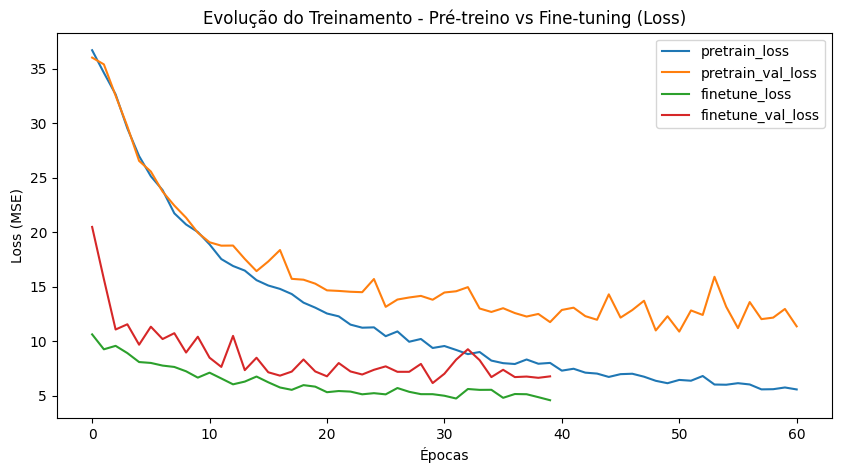


=== Exemplo de Previsões no conjunto de Validação ===
1/1 [==============================] - 0s 186ms/step
Amostra 0: [Real lat=1.270, lon=2.240] --> [Pred lat=0.732, lon=1.736]
Amostra 1: [Real lat=2.110, lon=1.010] --> [Pred lat=1.290, lon=1.019]
Amostra 2: [Real lat=0.690, lon=-2.110] --> [Pred lat=0.623, lon=-1.115]
Amostra 3: [Real lat=0.130, lon=0.860] --> [Pred lat=0.224, lon=0.850]
Amostra 4: [Real lat=5.530, lon=-1.650] --> [Pred lat=4.659, lon=-1.679]
Amostra 5: [Real lat=2.730, lon=-2.110] --> [Pred lat=2.215, lon=-1.860]
Amostra 6: [Real lat=-0.770, lon=-0.910] --> [Pred lat=-0.915, lon=-0.961]
Amostra 7: [Real lat=-0.770, lon=-0.910] --> [Pred lat=-0.538, lon=-1.070]
Amostra 8: [Real lat=4.790, lon=-1.100] --> [Pred lat=3.897, lon=-1.266]
Amostra 9: [Real lat=1.390, lon=0.680] --> [Pred lat=0.981, lon=0.804]


In [1]:
###############################################################################
# Bloco 1: Imports e Configurações
###############################################################################
import os
import ijson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, optimizers, regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

JSON_PATH = "../TABELAS/JSONS/Dataset_Vetor.json"
TARGET_COLS = ["diferencalatitudeMetros", "diferencalongitudeMetros"]
BATCH_SIZE = 4096
EPOCHS = 100
VAL_SPLIT = 0.2
MAX_SAMPLES = None  # limite para debug ou None

###############################################################################
# Bloco 2: Funções para descobrir chaves, converter dicionário -> (X, y), etc.
###############################################################################
def discover_feature_keys(json_path, max_samples=None):
    feature_keys_set = set()
    with open(json_path, "rb") as f:
        parser = ijson.items(f, "item")
        count = 0
        for record in parser:
            for k in record.keys():
                if k not in TARGET_COLS:
                    feature_keys_set.add(k)
            count += 1
            if max_samples and count >= max_samples:
                break
    return sorted(feature_keys_set)

def dict_to_numpy_fixed(record, feature_keys):
    for col in TARGET_COLS:
        if col not in record:
            return None, None
    try:
        lat = float(record["diferencalatitudeMetros"])
        lon = float(record["diferencalongitudeMetros"])
    except:
        return None, None

    y_array = np.array([lat, lon], dtype=np.float32)
    X_array = np.zeros(len(feature_keys), dtype=np.float32)
    for i, k in enumerate(feature_keys):
        val = record.get(k, 0.0)
        try:
            X_array[i] = float(val)
        except:
            X_array[i] = 0.0
    return X_array, y_array

def dataset_generator_ijson(json_path, feature_keys, max_samples=None):
    with open(json_path, "rb") as f:
        parser = ijson.items(f, "item")
        count = 0
        for record in parser:
            X, y = dict_to_numpy_fixed(record, feature_keys)
            if X is not None and y is not None:
                yield (X, y)
            count += 1
            if max_samples and count >= max_samples:
                break

def get_tf_dataset(json_path, feature_keys, max_samples=None,
                   batch_size=1024, shuffle_buffer=10000):
    gen_for_dim = dataset_generator_ijson(json_path, feature_keys, max_samples)
    first_sample = next(gen_for_dim, None)
    if first_sample is None:
        raise RuntimeError("Nenhum registro válido no JSON.")

    X_first, y_first = first_sample
    feature_dim = len(X_first)

    def final_generator():
        yield (X_first, y_first)
        for x, y in gen_for_dim:
            yield (x, y)
        gen_rest = dataset_generator_ijson(json_path, feature_keys, max_samples)
        next(gen_rest, None)
        for xx, yy in gen_rest:
            yield (xx, yy)

    ds = tf.data.Dataset.from_generator(
        final_generator,
        output_signature=(
            tf.TensorSpec(shape=(feature_dim,), dtype=tf.float32),
            tf.TensorSpec(shape=(2,), dtype=tf.float32)
        )
    )
    ds = ds.shuffle(shuffle_buffer).batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds, feature_dim

###############################################################################
# Bloco 3: Modelo (com blocos residuais) e função build_model
###############################################################################
def residual_block(x, units, dr=0.3, l2_reg=1e-5):
    sc = x
    x = layers.Dense(units, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(dr)(x)
    x = layers.Dense(units, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([sc, x])
    x = layers.Activation("relu")(x)
    return x

def build_model(input_dim):
    inp = keras.Input(shape=(input_dim,))
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-5))(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    for _ in range(5):
        x = residual_block(x, 1024, dr=0.3, l2_reg=1e-5)

    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-5))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    out = layers.Dense(2, activation='linear')(x)
    model = keras.Model(inp, out)
    model.compile(
        optimizer=optimizers.Adam(1e-4),
        loss='mse',
        metrics=['mae','mse']
    )
    return model

###############################################################################
# Bloco 4: MAIN - Treino, Fine-tuning, Gráficos e Predições
###############################################################################
def main():
    # 1) Descobrir chaves
    feature_keys = discover_feature_keys(JSON_PATH, max_samples=MAX_SAMPLES)
    if not feature_keys:
        print("Nenhuma feature encontrada. Verifique seu JSON.")
        return
    print(f"Total de features: {len(feature_keys)}")

    # 2) Carregar ds streaming
    ds, feature_dim = get_tf_dataset(
        JSON_PATH, feature_keys=feature_keys,
        max_samples=MAX_SAMPLES,
        batch_size=BATCH_SIZE
    )

    # 3) Extrair subset para pré-treino
    full_data = []
    for Xb, Yb in ds.take(50):  # 50 batches
        Xn = Xb.numpy()
        Yn = Yb.numpy()
        for i in range(len(Xn)):
            full_data.append((Xn[i], Yn[i]))

    # Precisamos recriar o ds pois já foi iterado
    ds, _ = get_tf_dataset(
        JSON_PATH, feature_keys=feature_keys,
        max_samples=MAX_SAMPLES,
        batch_size=BATCH_SIZE
    )

    # 4) Separar subset em train/val e normalizar
    X_np = np.array([fd[0] for fd in full_data], dtype=np.float32)
    y_np = np.array([fd[1] for fd in full_data], dtype=np.float32)
    from sklearn.model_selection import train_test_split
    X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(X_np, y_np, test_size=VAL_SPLIT, random_state=42)

    scaler = StandardScaler()
    scaler.fit(X_train_np)
    X_train_np = scaler.transform(X_train_np)
    X_val_np = scaler.transform(X_val_np)

    # 5) Normalizar no streaming via py_function + ensure_shape
    def scale_batch(Xb, Yb):
        arr = Xb.numpy()
        arr = scaler.transform(arr)
        return tf.convert_to_tensor(arr, dtype=tf.float32), Yb

    ds = ds.map(lambda Xb, Yb: tf.py_function(scale_batch, [Xb, Yb], [tf.float32, tf.float32]))
    def set_shapes(Xb, Yb):
        Xb = tf.ensure_shape(Xb, (None, feature_dim))
        Yb = tf.ensure_shape(Yb, (None, 2))
        return Xb, Yb

    ds = ds.map(set_shapes).prefetch(tf.data.AUTOTUNE)
    
    # Repetir o dataset para não "acabar"
    ds = ds.repeat()  
    # Defina quantos steps por epoch (estimado ou exato)
    steps_per_epoch = 100

    # 6) Construir o modelo
    model = build_model(feature_dim)
    model.summary()

    es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ckpt = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss')

    # 7) Treino offline (subset) e Fine-tuning (stream)
    print("\n=== Pré-treino offline no subset ===")
    history_pretrain = model.fit(
        X_train_np, y_train_np,
        validation_data=(X_val_np, y_val_np),
        epochs=EPOCHS,
        batch_size=2048,
        callbacks=[es, ckpt],
        verbose=1
    )

    print("\n=== Fine-tuning no dataset completo (streaming) ===")
    history_finetune = model.fit(
        ds,
        validation_data=(X_val_np, y_val_np),
        epochs=EPOCHS,
        callbacks=[es, ckpt],
        verbose=1,
        steps_per_epoch=steps_per_epoch
    )

    model.save("final_residual_model.h5")
    print("[INFO] Modelo final salvo em 'final_residual_model.h5'")

    ############################################################################
    # Bloco 5: Gráficos do treinamento (Loss vs. Épocas)
    ############################################################################
    plt.figure(figsize=(10, 5))
    plt.title("Evolução do Treinamento - Pré-treino vs Fine-tuning (Loss)")
    plt.plot(history_pretrain.history['loss'], label='pretrain_loss')
    plt.plot(history_pretrain.history['val_loss'], label='pretrain_val_loss')
    plt.plot(history_finetune.history['loss'], label='finetune_loss')
    plt.plot(history_finetune.history['val_loss'], label='finetune_val_loss')
    plt.xlabel("Épocas")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.show()

    ############################################################################
    # Bloco 6: Exemplo de predição vs. real
    ############################################################################
    print("\n=== Exemplo de Previsões no conjunto de Validação ===")
    preds = model.predict(X_val_np[:10])
    for i in range(10):
        real_lat, real_lon = y_val_np[i]
        pred_lat, pred_lon = preds[i]
        print(f"Amostra {i}: [Real lat={real_lat:.3f}, lon={real_lon:.3f}] --> [Pred lat={pred_lat:.3f}, lon={pred_lon:.3f}]")

###############################################################################
# Execução
###############################################################################
if __name__ == "__main__":
    main()
